In [15]:
%time
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import logging
import datetime

logger = logging.getLogger()
logging.info('This is a debug message')
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



Wall time: 0 ns


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
counter=1

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#If the city is unique, then add it to a our cities list
     if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

# List for holding lat_lngs and cities
lat = []
lng = []
maxtemp = []
windspeed = []
humidity=[]
date=[]
country=[]
cloudiness=[]
city=[]
responses = []

#loop through each city to get the json response
print(f"Beginning Data Retrieval")
print("-----------------------------------------")
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?appid="+api_key+"&units=Imperial" +"&q="+ city
    
    print("Processing Record " + str(counter) + " of Set 1 | " + str(city)+ "  " + str(url) )
    weather_response = requests.get(url).json()
    responses.append(weather_response)
    counter=counter+1

print("-------------------------------------")
print(f"Data Retrieval Complete")
print("-------------------------------------")

#Fetch lng, lat,Max temp, Wind Speed, Humidity,Date,City,Country,Cloudiness data from json response
lng= [res['coord']['lon'] for res in responses if 'coord' in res]
lat = [res['coord']['lat'] for res in responses if 'coord' in res]
maxtemp = [res['main']['temp_max'] for res in responses if 'main' in res]
windspeed = [res['wind']['speed'] for res in responses if 'wind' in res]
humidity = [res['main']['humidity'] for res in responses if 'main' in res]
date = [res['dt'] for res in responses if 'dt' in res]
city = [res['name'] for res in responses if 'name' in res]
country = [res['sys']['country'] for res in responses if 'sys' in res]
cloudiness=[res['clouds']['all'] for res in responses if 'clouds' in res]

#Create Selected cities dataframe
city_data = {"City": city,"Cloudiness":cloudiness,"Country":country,"Date":date , "Humidity":humidity , "Lat":lat,"Lng":lng,"Max Temp":maxtemp,"Wind Speed":windspeed}
city_df = pd.DataFrame(city_data)

#Drop Duplicate cities
city_df.drop_duplicates

#Select 500 sample cities
selected_cities_df = city_df.sample(500)

#Save output in csv
selected_cities_df.to_csv("../Output Csv/SelectedCities.csv",index=False, header=True)

selected_cities_df.head()


Beginning Data Retrieval
-----------------------------------------
Processing Record 1 of Set 1 | dakar  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=dakar
Processing Record 2 of Set 1 | springdale  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=springdale
Processing Record 3 of Set 1 | port jervis  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=port jervis
Processing Record 4 of Set 1 | ribeira grande  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=ribeira grande
Processing Record 5 of Set 1 | kangaatsiaq  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kangaatsiaq
Processing Record 6 of Set 1 | northam  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=nor

Processing Record 54 of Set 1 | kulhudhuffushi  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kulhudhuffushi
Processing Record 55 of Set 1 | kaeo  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kaeo
Processing Record 56 of Set 1 | barrow  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=barrow
Processing Record 57 of Set 1 | tiarei  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=tiarei
Processing Record 58 of Set 1 | ilulissat  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=ilulissat
Processing Record 59 of Set 1 | busselton  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=busselton
Processing Record 60 of Set 1 | nikolskoye  http://api.openweathermap.org/da

Processing Record 107 of Set 1 | itarema  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=itarema
Processing Record 108 of Set 1 | meulaboh  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=meulaboh
Processing Record 109 of Set 1 | alofi  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=alofi
Processing Record 110 of Set 1 | poso  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=poso
Processing Record 111 of Set 1 | bredasdorp  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=bredasdorp
Processing Record 112 of Set 1 | kaitangata  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kaitangata
Processing Record 113 of Set 1 | half moon bay  http://api.openweathermap.org/

Processing Record 160 of Set 1 | kouango  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kouango
Processing Record 161 of Set 1 | paradwip  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=paradwip
Processing Record 162 of Set 1 | kuryk  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kuryk
Processing Record 163 of Set 1 | dingle  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=dingle
Processing Record 164 of Set 1 | gornyy  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=gornyy
Processing Record 165 of Set 1 | tilichiki  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=tilichiki
Processing Record 166 of Set 1 | hasaki  http://api.openweathermap.org/data/2.5/weat

Processing Record 214 of Set 1 | yellowknife  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=yellowknife
Processing Record 215 of Set 1 | geraldton  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=geraldton
Processing Record 216 of Set 1 | semme  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=semme
Processing Record 217 of Set 1 | talnakh  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=talnakh
Processing Record 218 of Set 1 | tiznit  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=tiznit
Processing Record 219 of Set 1 | lavrentiya  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=lavrentiya
Processing Record 220 of Set 1 | sangmelima  http://api.openweathermap

Processing Record 268 of Set 1 | sitka  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=sitka
Processing Record 269 of Set 1 | holsted  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=holsted
Processing Record 270 of Set 1 | manado  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=manado
Processing Record 271 of Set 1 | whitehorse  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=whitehorse
Processing Record 272 of Set 1 | saint george  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=saint george
Processing Record 273 of Set 1 | raga  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=raga
Processing Record 274 of Set 1 | pousat  http://api.openweathermap.org/data/2.

Processing Record 321 of Set 1 | puerto baquerizo moreno  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=puerto baquerizo moreno
Processing Record 322 of Set 1 | bonavista  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=bonavista
Processing Record 323 of Set 1 | rockland  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=rockland
Processing Record 324 of Set 1 | general roca  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=general roca
Processing Record 325 of Set 1 | svetlaya  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=svetlaya
Processing Record 326 of Set 1 | barentsburg  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=barentsburg
Processing Record 327 of

Processing Record 374 of Set 1 | toul  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=toul
Processing Record 375 of Set 1 | quatre cocos  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=quatre cocos
Processing Record 376 of Set 1 | manjo  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=manjo
Processing Record 377 of Set 1 | tomatlan  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=tomatlan
Processing Record 378 of Set 1 | reo  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=reo
Processing Record 379 of Set 1 | douglas  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=douglas
Processing Record 380 of Set 1 | khonuu  http://api.openweathermap.org/data/2.5/weather?

Processing Record 427 of Set 1 | margate  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=margate
Processing Record 428 of Set 1 | tubruq  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=tubruq
Processing Record 429 of Set 1 | tanout  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=tanout
Processing Record 430 of Set 1 | zhob  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=zhob
Processing Record 431 of Set 1 | balotra  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=balotra
Processing Record 432 of Set 1 | nyagan  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=nyagan
Processing Record 433 of Set 1 | viligili  http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 480 of Set 1 | salzhemmendorf  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=salzhemmendorf
Processing Record 481 of Set 1 | pangoa  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=pangoa
Processing Record 482 of Set 1 | phan thiet  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=phan thiet
Processing Record 483 of Set 1 | ayan  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=ayan
Processing Record 484 of Set 1 | arnedo  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=arnedo
Processing Record 485 of Set 1 | amapa  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=amapa
Processing Record 486 of Set 1 | sakakah  http://api.openweathermap.org/data

Processing Record 533 of Set 1 | kambove  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kambove
Processing Record 534 of Set 1 | port blair  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=port blair
Processing Record 535 of Set 1 | nishihara  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=nishihara
Processing Record 536 of Set 1 | yarensk  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=yarensk
Processing Record 537 of Set 1 | westport  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=westport
Processing Record 538 of Set 1 | kyra  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kyra
Processing Record 539 of Set 1 | labuhan  http://api.openweathermap.org/data

Processing Record 587 of Set 1 | serebryansk  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=serebryansk
Processing Record 588 of Set 1 | magadan  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=magadan
Processing Record 589 of Set 1 | oktyabrskoye  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=oktyabrskoye
Processing Record 590 of Set 1 | reconquista  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=reconquista
Processing Record 591 of Set 1 | sorland  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=sorland
Processing Record 592 of Set 1 | rawannawi  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=rawannawi
Processing Record 593 of Set 1 | banikoara  http://a

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
39,Inirida,92,CO,1532488401,100,3.87,-67.92,72.15,2.15
301,Vilyuysk,0,RU,1532488480,58,63.75,121.63,62.97,4.94
494,Zaragoza,0,ES,1532487600,68,41.65,-0.88,71.60,9.17
75,Toamasina,75,MG,1532484000,93,-18.17,49.38,66.20,9.17
403,Hokitika,92,NZ,1532488509,100,-42.72,170.96,47.49,6.40


## Perform API Calls

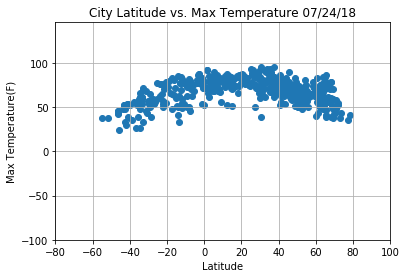

In [18]:
#Latitude Vs Temperature Plot

plt.scatter(selected_cities_df['Lat'],selected_cities_df['Max Temp'])
plt.xlim(-80, len(selected_cities_df['Lat'])-400)
plt.ylim(-100, max(selected_cities_df['Max Temp'])+50)

today_date = datetime.datetime.now().strftime('%D')

#Display labels in graph
plt.title(f"City Latitude vs. Max Temperature {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()

# Save Figure
plt.savefig("../Images/LatitudevsTemp.png")



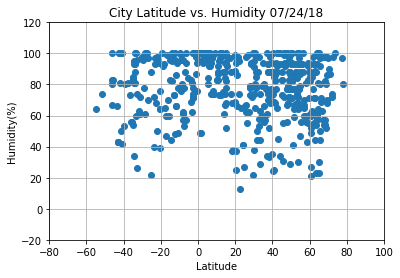

In [19]:
#Latitude Vs Humidity Plot

plt.scatter(selected_cities_df['Lat'],selected_cities_df['Humidity'])
plt.xlim(-80, len(selected_cities_df['Lat'])-400)
plt.ylim(-20, max(selected_cities_df['Humidity'])+20)

#Display labels in graph
plt.title(f"City Latitude vs. Humidity {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

# Save Figure
plt.savefig("../Images/LatitudevsHumidity.png")

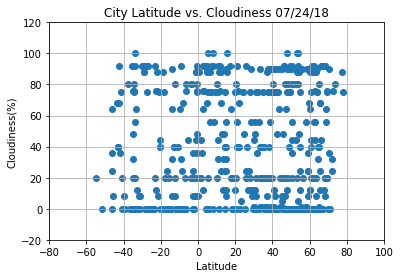

In [20]:
#Latitude Vs Cloudiness Plot

plt.scatter(selected_cities_df['Lat'],selected_cities_df['Cloudiness'])
plt.xlim(-80, len(selected_cities_df['Lat'])-400)
plt.ylim(-20, max(selected_cities_df['Cloudiness'])+20)

#Display labels in graph
plt.title(f"City Latitude vs. Cloudiness {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save Figure
plt.savefig("../Images/LatitudevsCloudiness.png")

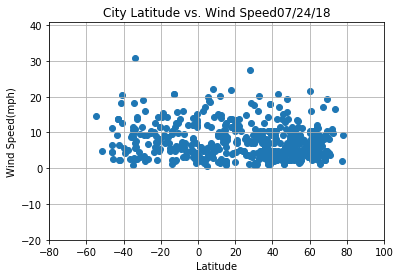

In [22]:
#Latitude Vs WindSpeed Plot

plt.scatter(selected_cities_df['Lat'],selected_cities_df['Wind Speed'])
plt.xlim(-80, len(selected_cities_df['Lat'])-400)
plt.ylim(-20, max(selected_cities_df['Wind Speed'])+10)

#Display labels in graph
plt.title(f"City Latitude vs. Wind Speed{today_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()

# Save Figure
plt.savefig("../Images/LatitudevsWindSpeed.png")